# Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?


### Подсказка
*Визуализируйте разницу веса до и после терапии.  
Воспользуйтесь критерием знаковых рангов Вилкоксона для проверки гипотезы о равенстве средних в двух группах.   
Проверьте себя: постройте доверительный интервал на медиану/среднее значение прироста веса при помощи бутстрапа.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('weight.tsv', sep='\t')
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


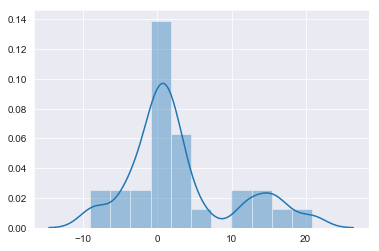

In [5]:
sns.distplot(df['After'] - df['Before'])

In [7]:
from scipy.stats import shapiro
_, pval = shapiro(df['After'] - df['Before'])
print('Pvalue: {:.4f}'.format(pval))

Pvalue: 0.0079


**Так как выборки связанные, данные отличаются от нормального (pval=0.0079), применим непараметрический критерий Вилкоксона**

In [19]:
from scipy.stats import wilcoxon
wilcoxon(df['Before'], df['After'])

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

**Проверим себя при помощи бутстрапа**

In [39]:
n_bootstrap_samples = 10000
bs_mean_diffs = []
for i in range(n_bootstrap_samples):
    sample_df = df.sample(n=len(df), replace=True)
    bs_mean_diffs.append(np.median(sample_df['After'] - sample_df['Before']))
bs_mean_diffs = np.array(bs_mean_diffs)

In [43]:
print('Boostrap pval: {}'.format(np.mean(bs_mean_diffs < 0)))

Boostrap pval: 0.0969


In [41]:
print('Confidence interval: [{:.2f}, {:.2f}]'.format(*np.percentile(bs_mean_diffs, [2.5, 97.5])))

Confidence interval: [-0.30, 2.40]


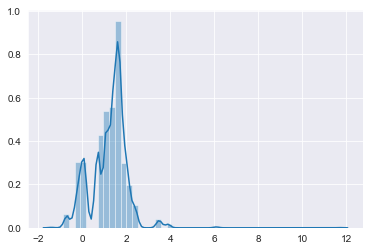

In [42]:
sns.distplot(bs_mean_diffs)

###  Вывод
Данных не достаточно чтобы говорить о том, что поведенческая терапия помогает при анорексии. Доверительный интервал на изменение веса: [-0.30, 2.40]